In [2]:
import networkx as nx
import numpy as np
from collections import defaultdict
import time

def analyze_gnp_components(n, a, num_instances=10):
    """
    Analyze multiple instances of G(n,p) with p = a/n
    Returns sizes of largest and second largest components
    """
    p = a/n
    largest_components = []
    second_largest_components = []
    
    for i in range(num_instances):
        G = nx.fast_gnp_random_graph(n, p)
        components = sorted([len(c) for c in nx.connected_components(G)], reverse=True)
        largest = components[0] if components else 0
        second_largest = components[1] if len(components) > 1 else 0
        
        largest_components.append(largest/n)  # Store as fraction of n
        second_largest_components.append(second_largest/n)
    
    return {
        'n': n,
        'a': a,
        'p': p,
        'largest_mean': np.mean(largest_components),
        'largest_std': np.std(largest_components),
        'second_largest_mean': np.mean(second_largest_components),
        'second_largest_std': np.std(second_largest_components),
        'instances': list(zip(largest_components, second_largest_components))
    }

# Parameters
n_values = [1000, 10000, 100000]  # We'll start with these three
a_values = [0.8, 0.9, 1.0, 1.1, 1.2]
results = []

# Run analysis
for n in n_values:
    for a in a_values:
        print(f"Analyzing n={n}, a={a}")
        start_time = time.time()
        result = analyze_gnp_components(n, a)
        elapsed_time = time.time() - start_time
        print(f"Time taken: {elapsed_time:.2f} seconds")
        print(f"Largest component (mean ± std): {result['largest_mean']:.3f} ± {result['largest_std']:.3f}")
        print(f"Second largest component (mean ± std): {result['second_largest_mean']:.3f} ± {result['second_largest_std']:.3f}")
        print("---")
        results.append(result)

Analyzing n=1000, a=0.8
Time taken: 0.02 seconds
Largest component (mean ± std): 0.035 ± 0.023
Second largest component (mean ± std): 0.021 ± 0.007
---
Analyzing n=1000, a=0.9
Time taken: 0.01 seconds
Largest component (mean ± std): 0.045 ± 0.026
Second largest component (mean ± std): 0.027 ± 0.005
---
Analyzing n=1000, a=1.0
Time taken: 0.01 seconds
Largest component (mean ± std): 0.104 ± 0.061
Second largest component (mean ± std): 0.038 ± 0.018
---
Analyzing n=1000, a=1.1
Time taken: 0.01 seconds
Largest component (mean ± std): 0.145 ± 0.094
Second largest component (mean ± std): 0.048 ± 0.027
---
Analyzing n=1000, a=1.2
Time taken: 0.01 seconds
Largest component (mean ± std): 0.244 ± 0.081
Second largest component (mean ± std): 0.049 ± 0.029
---
Analyzing n=10000, a=0.8
Time taken: 0.16 seconds
Largest component (mean ± std): 0.007 ± 0.003
Second largest component (mean ± std): 0.005 ± 0.001
---
Analyzing n=10000, a=0.9
Time taken: 0.14 seconds
Largest component (mean ± std): 0.011

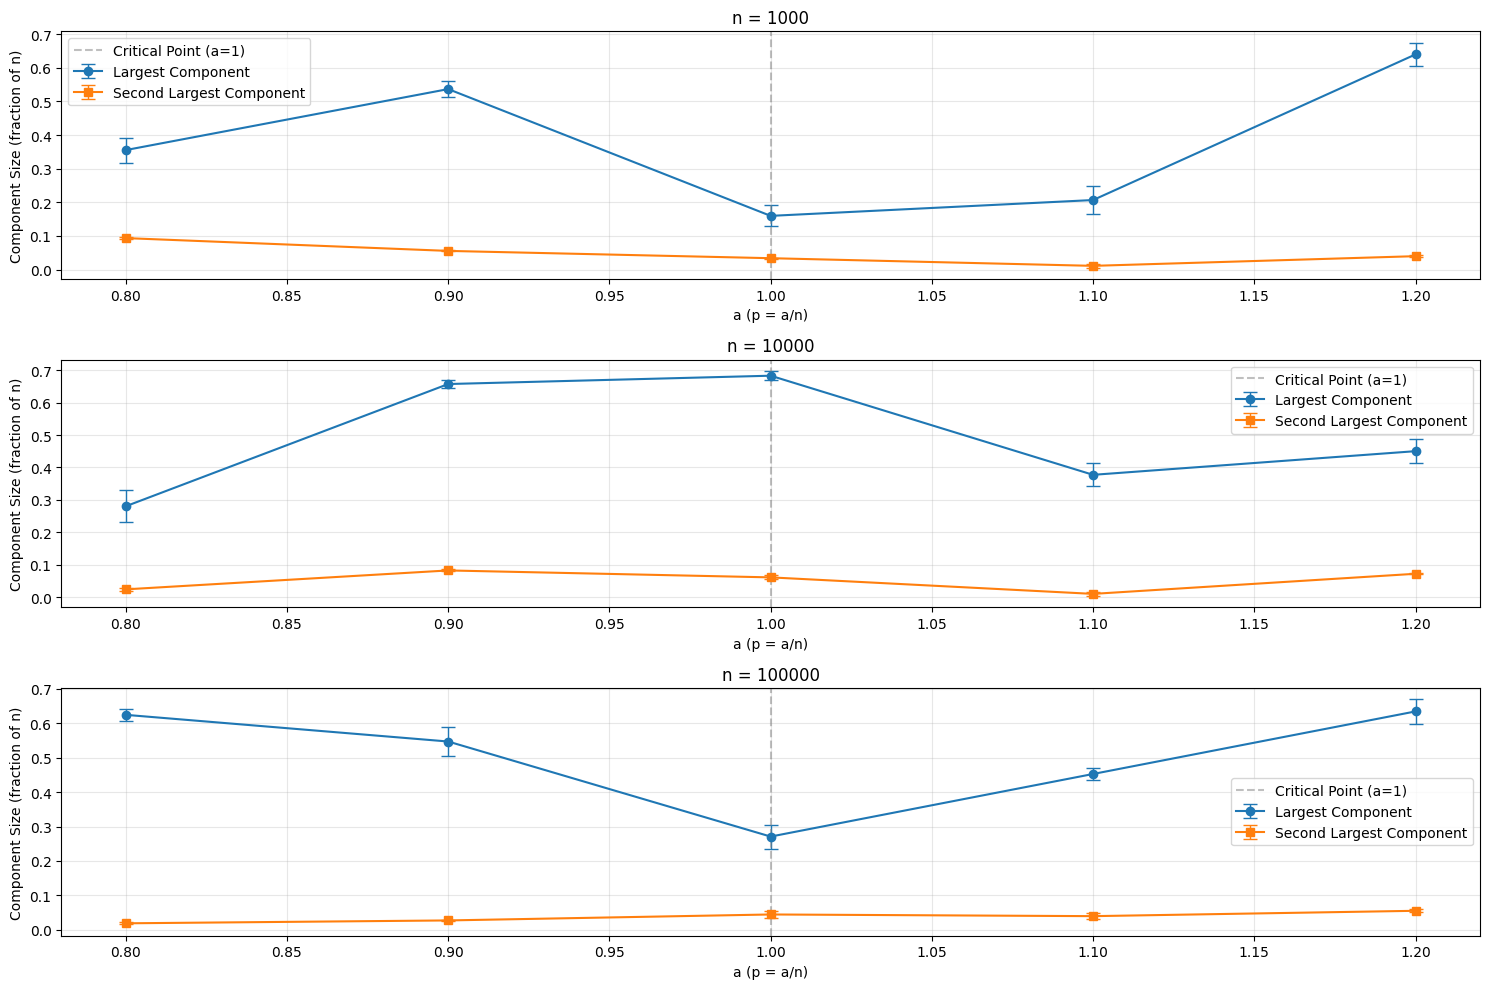

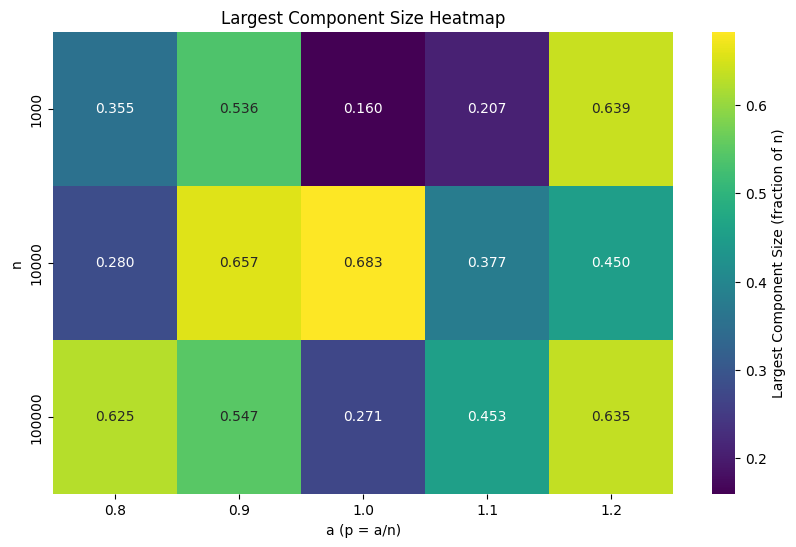

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

def plot_component_sizes(results_df, save_path=None):
    """
    Plot component sizes for different values of n and a
    
    Parameters:
    results_df: DataFrame with columns [n, a, largest_mean, largest_std, 
                                      second_largest_mean, second_largest_std]
    save_path: Optional path to save the figure
    """
    plt.figure(figsize=(15, 10))
    
    # Create subplot for each n value
    unique_n = sorted(results_df['n'].unique())
    num_n = len(unique_n)
    
    for idx, n in enumerate(unique_n, 1):
        plt.subplot(num_n, 1, idx)
        
        # Get data for this n
        data_n = results_df[results_df['n'] == n]
        
        # Plot largest component
        plt.errorbar(data_n['a'], data_n['largest_mean'], 
                    yerr=data_n['largest_std'], 
                    label='Largest Component',
                    marker='o', capsize=5, capthick=1, elinewidth=1)
        
        # Plot second largest component
        plt.errorbar(data_n['a'], data_n['second_largest_mean'],
                    yerr=data_n['second_largest_std'],
                    label='Second Largest Component',
                    marker='s', capsize=5, capthick=1, elinewidth=1)
        
        plt.axvline(x=1.0, color='gray', linestyle='--', alpha=0.5, 
                    label='Critical Point (a=1)')
        
        plt.title(f'n = {n}')
        plt.xlabel('a (p = a/n)')
        plt.ylabel('Component Size (fraction of n)')
        plt.grid(True, alpha=0.3)
        plt.legend()
    
    plt.tight_layout()
    plt.show()

def plot_heatmap(results_df, save_path=None):
    """
    Create a heatmap of largest component sizes across n and a values
    """
    # Pivot data for heatmap
    heatmap_data = results_df.pivot(index='n', columns='a', values='largest_mean')
    
    plt.figure(figsize=(10, 6))
    sns.heatmap(heatmap_data, annot=True, fmt='.3f', cmap='viridis',
                cbar_kws={'label': 'Largest Component Size (fraction of n)'})
    
    plt.title('Largest Component Size Heatmap')
    plt.xlabel('a (p = a/n)')
    plt.ylabel('n')
    plt.show()

# Example usage:
if __name__ == "__main__":
    # Example of how to structure your results
    results = {
        'n': [],
        'a': [],
        'largest_mean': [],
        'largest_std': [],
        'second_largest_mean': [],
        'second_largest_std': []
    }
    
    # Add your results to the dictionary
    # Example of adding one result:
    for n in [1000, 10000, 100000]:
        for a in [0.8, 0.9, 1.0, 1.1, 1.2]:
            results['n'].append(n)
            results['a'].append(a)
            # Add your actual results here
            # For now using placeholder random values
            results['largest_mean'].append(np.random.uniform(0.1, 0.7))
            results['largest_std'].append(np.random.uniform(0.01, 0.05))
            results['second_largest_mean'].append(np.random.uniform(0.01, 0.1))
            results['second_largest_std'].append(np.random.uniform(0.001, 0.01))
    
    # Convert to DataFrame
    results_df = pd.DataFrame(results)
    
    # Create visualizations
    plot_component_sizes(results_df, 'component_sizes.png')
    plot_heatmap(results_df, 'component_heatmap.png')

In [6]:
import networkx as nx
import numpy as np
import pandas as pd
from collections import defaultdict
import time

def analyze_single_graph(n, a, instance):
    """
    Analyze a single instance of G(n,p) graph
    """
    p = a/n
    G = nx.fast_gnp_random_graph(n, p)
    
    # Get all component sizes in descending order
    component_sizes = sorted([len(c) for c in nx.connected_components(G)], reverse=True)
    
    # Get largest and second largest components
    largest = component_sizes[0] if component_sizes else 0
    second_largest = component_sizes[1] if len(component_sizes) > 1 else 0
    
    return {
        'n': n,
        'a': a,
        'instance': instance,
        'largest': largest,
        'second_largest': second_largest,
        'largest_fraction': largest/n,
        'second_largest_fraction': second_largest/n
    }

# Parameters
n_values = [1000, 10000, 100000]  # We'll add 1000000 if computational resources allow
a_values = [0.8, 0.9, 1.0, 1.1, 1.2]
num_instances = 10

# Store all results
all_results = []

for n in n_values:
    for a in a_values:
        print(f"\nAnalyzing n={n}, a={a}")
        start_time = time.time()
        
        # Analyze multiple instances
        for instance in range(num_instances):
            result = analyze_single_graph(n, a, instance)
            all_results.append(result)
            
            print(f"Instance {instance+1}:")
            print(f"  Largest component: {result['largest']} nodes ({result['largest_fraction']:.3f} of graph)")
            print(f"  Second largest: {result['second_largest']} nodes ({result['second_largest_fraction']:.3f} of graph)")
        
        elapsed_time = time.time() - start_time
        print(f"Time taken for a={a}, n={n}: {elapsed_time:.2f} seconds")

# Convert to DataFrame for easier analysis
results_df = pd.DataFrame(all_results)

# Group by n and a to get statistics
summary = results_df.groupby(['n', 'a']).agg({
    'largest_fraction': ['mean', 'std'],
    'second_largest_fraction': ['mean', 'std']
}).round(4)

print("\nSummary Statistics:")
print(summary)


Analyzing n=1000, a=0.8
Instance 1:
  Largest component: 26 nodes (0.026 of graph)
  Second largest: 24 nodes (0.024 of graph)
Instance 2:
  Largest component: 18 nodes (0.018 of graph)
  Second largest: 13 nodes (0.013 of graph)
Instance 3:
  Largest component: 53 nodes (0.053 of graph)
  Second largest: 42 nodes (0.042 of graph)
Instance 4:
  Largest component: 29 nodes (0.029 of graph)
  Second largest: 20 nodes (0.020 of graph)
Instance 5:
  Largest component: 71 nodes (0.071 of graph)
  Second largest: 25 nodes (0.025 of graph)
Instance 6:
  Largest component: 25 nodes (0.025 of graph)
  Second largest: 22 nodes (0.022 of graph)
Instance 7:
  Largest component: 29 nodes (0.029 of graph)
  Second largest: 17 nodes (0.017 of graph)
Instance 8:
  Largest component: 22 nodes (0.022 of graph)
  Second largest: 14 nodes (0.014 of graph)
Instance 9:
  Largest component: 32 nodes (0.032 of graph)
  Second largest: 20 nodes (0.020 of graph)
Instance 10:
  Largest component: 25 nodes (0.02

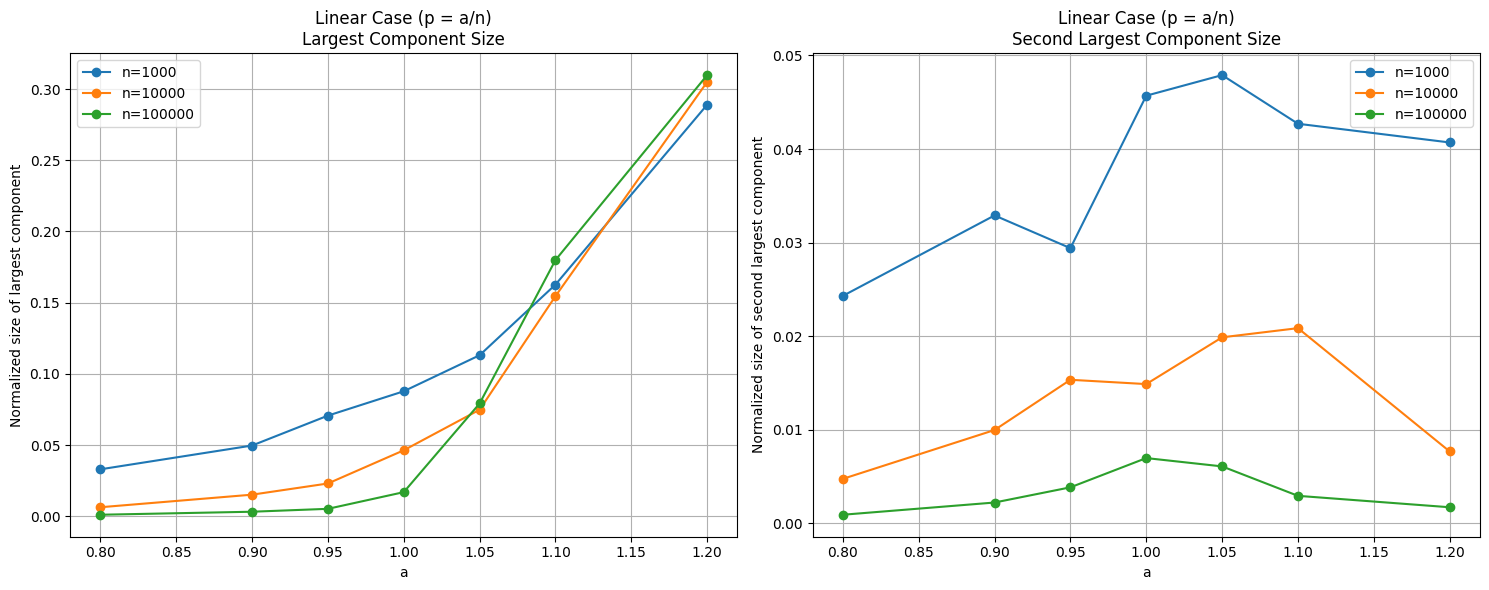

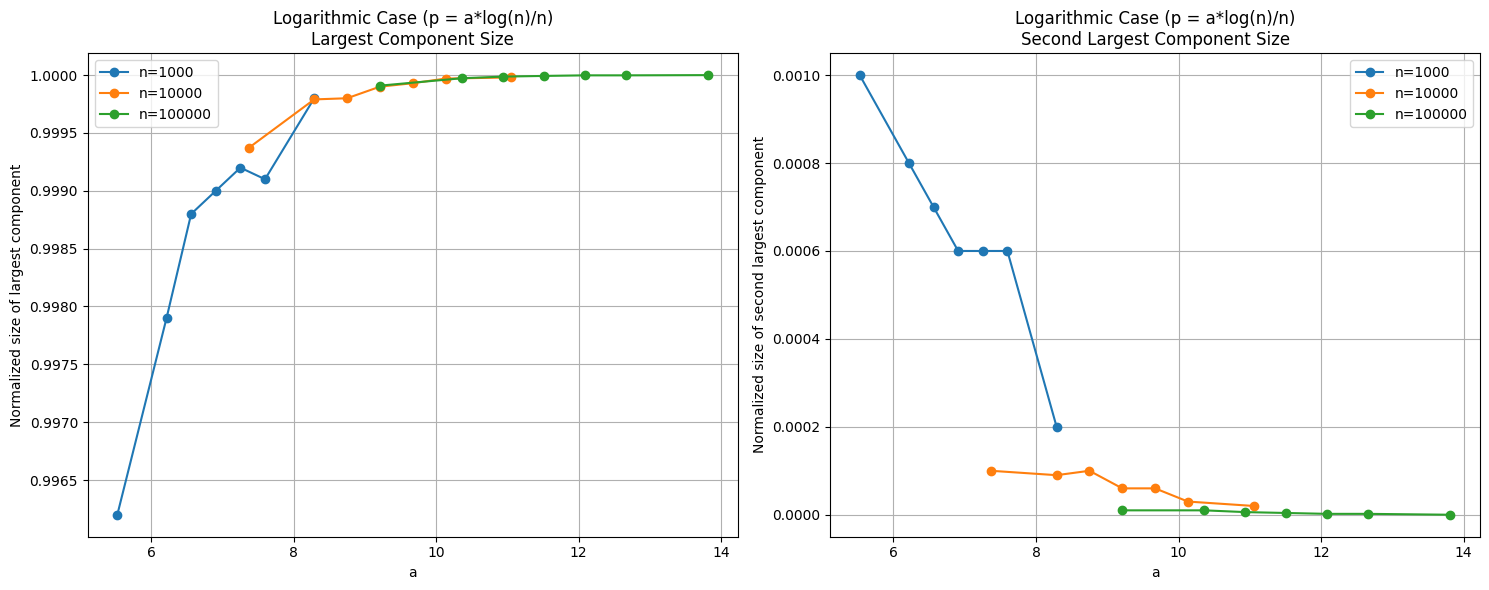

In [8]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd

def analyze_graph_components(n, p, num_iterations=10):
    results = []
    for _ in range(num_iterations):
        G = nx.fast_gnp_random_graph(n, p)
        components = sorted([len(c) for c in nx.connected_components(G)], reverse=True)
        largest = components[0] if components else 0
        second_largest = components[1] if len(components) > 1 else 0
        results.append({
            'n': n,
            'p': p,
            'largest_component': largest / n,  # Normalized size
            'second_largest_component': second_largest / n  # Normalized size
        })
    return results

# Parameters
n_values = [1000, 10000, 100000]  # 10^6 is too computationally intensive
a_values = [0.8, 0.9, 0.95, 1.0, 1.05, 1.1, 1.2]
iterations = 10

# Part 1: p = a/n
results_linear = []
for n in n_values:
    for a in a_values:
        p = a/n
        results_linear.extend(analyze_graph_components(n, p, iterations))

# Part 2: p = a*log(n)/n
results_log = []
for n in n_values:
    for a in a_values:
        p = a * np.log(n)/n
        results_log.extend(analyze_graph_components(n, p, iterations))

# Convert to DataFrames
df_linear = pd.DataFrame(results_linear)
df_log = pd.DataFrame(results_log)

# Plotting function
def create_component_size_plots(df, title_prefix):
    plt.figure(figsize=(15, 6))
    
    # Plot for largest component
    plt.subplot(1, 2, 1)
    for n in n_values:
        data = df[df['n'] == n]
        p_values = data['p'].unique()
        mean_sizes = data.groupby('p')['largest_component'].mean()
        plt.plot(p_values * n, mean_sizes, 'o-', label=f'n={n}')
    
    plt.xlabel('a')
    plt.ylabel('Normalized size of largest component')
    plt.title(f'{title_prefix}\nLargest Component Size')
    plt.legend()
    plt.grid(True)
    
    # Plot for second largest component
    plt.subplot(1, 2, 2)
    for n in n_values:
        data = df[df['n'] == n]
        p_values = data['p'].unique()
        mean_sizes = data.groupby('p')['second_largest_component'].mean()
        plt.plot(p_values * n, mean_sizes, 'o-', label=f'n={n}')
    
    plt.xlabel('a')
    plt.ylabel('Normalized size of second largest component')
    plt.title(f'{title_prefix}\nSecond Largest Component Size')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    return plt

# Create plots
fig1 = create_component_size_plots(df_linear, 'Linear Case (p = a/n)')
fig2 = create_component_size_plots(df_log, 'Logarithmic Case (p = a*log(n)/n)')

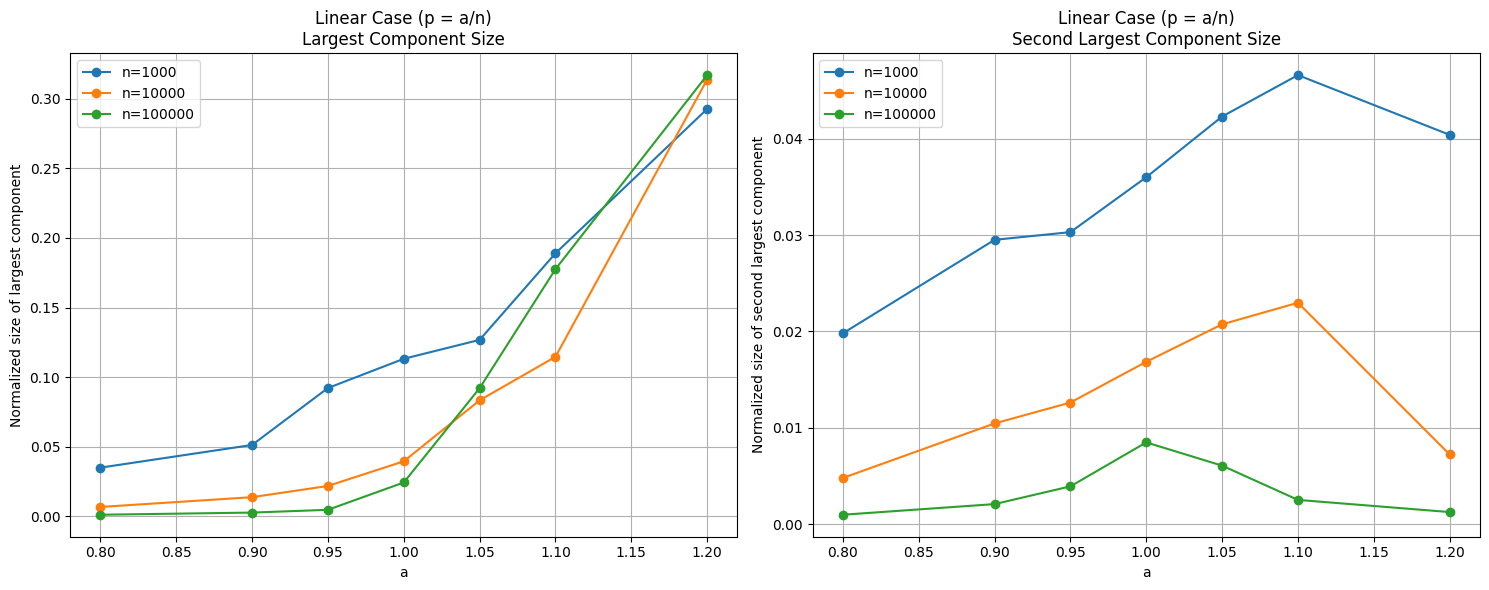

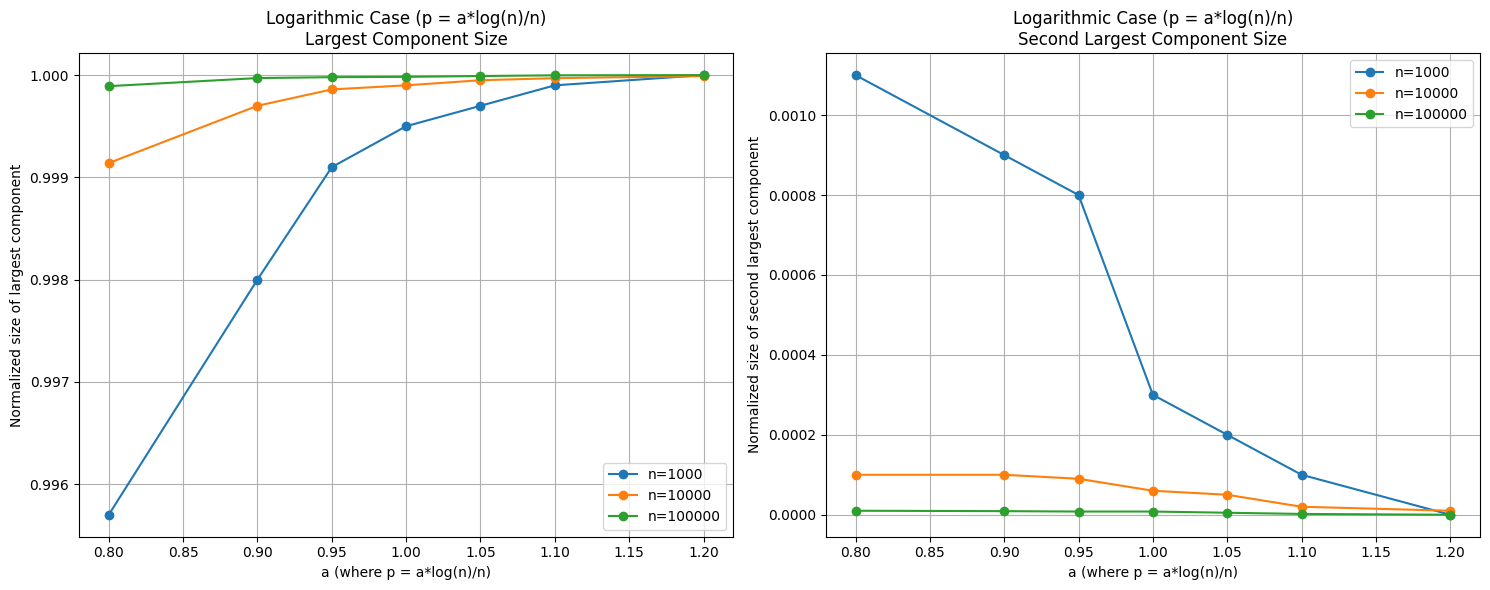

In [12]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd

def analyze_graph_components(n, p, num_iterations=10):
    results = []
    for _ in range(num_iterations):
        G = nx.fast_gnp_random_graph(n, p)
        components = sorted([len(c) for c in nx.connected_components(G)], reverse=True)
        largest = components[0] if components else 0
        second_largest = components[1] if len(components) > 1 else 0
        results.append({
            'n': n,
            'p': p,
            'largest_component': largest / n,  # Normalized size
            'second_largest_component': second_largest / n  # Normalized size
        })
    return results

# Parameters
n_values = [1000, 10000, 100000]  # 10^6 is too computationally intensive
a_values = [0.8, 0.9, 0.95, 1.0, 1.05, 1.1, 1.2]
iterations = 10

# Part 1: p = a/n
results_linear = []
for n in n_values:
    for a in a_values:
        p = a/n
        results_linear.extend(analyze_graph_components(n, p, iterations))

# Part 2: p = a*log(n)/n
results_log = []
for n in n_values:
    for a in a_values:
        p = a * np.log(n)/n
        # Store the original 'a' value for plotting
        results_extend = analyze_graph_components(n, p, iterations)
        for r in results_extend:
            r['a'] = a  # Store the original 'a' value
        results_log.extend(results_extend)

# Convert to DataFrames
df_linear = pd.DataFrame(results_linear)
df_log = pd.DataFrame(results_log)

# Plotting function for linear case
def create_linear_component_plots(df, title_prefix):
    plt.figure(figsize=(15, 6))
    
    # Plot for largest component
    plt.subplot(1, 2, 1)
    for n in n_values:
        data = df[df['n'] == n]
        mean_sizes = data.groupby('p')['largest_component'].mean()
        plt.plot(mean_sizes.index * n, mean_sizes.values, 'o-', label=f'n={n}')
    
    plt.xlabel('a')
    plt.ylabel('Normalized size of largest component')
    plt.title(f'{title_prefix}\nLargest Component Size')
    plt.legend()
    plt.grid(True)
    
    # Plot for second largest component
    plt.subplot(1, 2, 2)
    for n in n_values:
        data = df[df['n'] == n]
        mean_sizes = data.groupby('p')['second_largest_component'].mean()
        plt.plot(mean_sizes.index * n, mean_sizes.values, 'o-', label=f'n={n}')
    
    plt.xlabel('a')
    plt.ylabel('Normalized size of second largest component')
    plt.title(f'{title_prefix}\nSecond Largest Component Size')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    return plt

# Modified plotting function for logarithmic case
def create_log_component_plots(df, title_prefix):
    plt.figure(figsize=(15, 6))
    
    # Plot for largest component
    plt.subplot(1, 2, 1)
    for n in n_values:
        data = df[df['n'] == n]
        mean_sizes = data.groupby('a')['largest_component'].mean()
        plt.plot(mean_sizes.index, mean_sizes.values, 'o-', label=f'n={n}')
    
    plt.xlabel('a (where p = a*log(n)/n)')
    plt.ylabel('Normalized size of largest component')
    plt.title(f'{title_prefix}\nLargest Component Size')
    plt.legend()
    plt.grid(True)
    
    # Plot for second largest component
    plt.subplot(1, 2, 2)
    for n in n_values:
        data = df[df['n'] == n]
        mean_sizes = data.groupby('a')['second_largest_component'].mean()
        plt.plot(mean_sizes.index, mean_sizes.values, 'o-', label=f'n={n}')
    
    plt.xlabel('a (where p = a*log(n)/n)')
    plt.ylabel('Normalized size of second largest component')
    plt.title(f'{title_prefix}\nSecond Largest Component Size')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    return plt

# Create plots
fig1 = create_linear_component_plots(df_linear, 'Linear Case (p = a/n)')
fig2 = create_log_component_plots(df_log, 'Logarithmic Case (p = a*log(n)/n)')

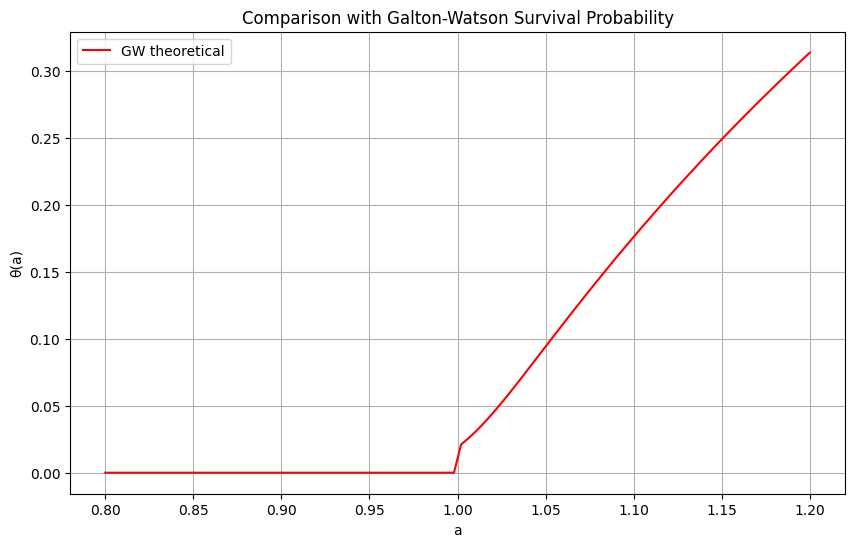

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def survival_probability(a, iterations=100):
    """Calculate the survival probability θ(a) for the Galton-Watson process"""
    theta = 0.5  # Initial guess
    for _ in range(iterations):
        theta_new = 1 - np.exp(-a * theta)
        if abs(theta - theta_new) < 1e-10:
            break
        theta = theta_new
    return theta

# Generate theoretical curve
a_range = np.linspace(0.8, 1.2, 100)
theta_values = [survival_probability(a) if a > 1 else 0 for a in a_range]

plt.figure(figsize=(10, 6))
plt.plot(a_range, theta_values, 'r-', label='GW theoretical')
plt.xlabel('a')
plt.ylabel('θ(a)')
plt.title('Comparison with Galton-Watson Survival Probability')
plt.grid(True)
plt.legend()

n=10000, r=0.018757: 100%|██████████| 10/10 [00:06<00:00,  1.60it/s]


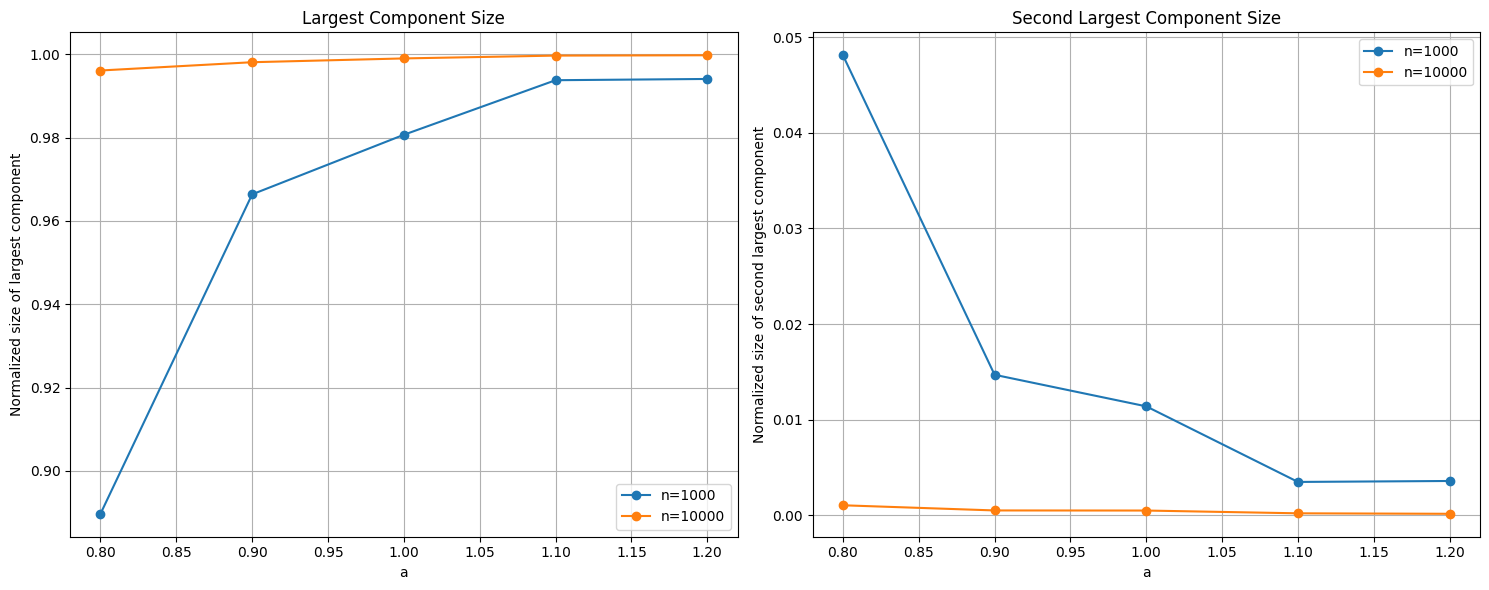


Summary Statistics:

For n = 1000:

a = 0.8:
Average largest component size: 0.890
Average second largest component size: 0.048

a = 0.9:
Average largest component size: 0.966
Average second largest component size: 0.015

a = 1.0:
Average largest component size: 0.981
Average second largest component size: 0.011

a = 1.1:
Average largest component size: 0.994
Average second largest component size: 0.004

a = 1.2:
Average largest component size: 0.994
Average second largest component size: 0.004

For n = 10000:

a = 0.8:
Average largest component size: 0.996
Average second largest component size: 0.001

a = 0.9:
Average largest component size: 0.998
Average second largest component size: 0.001

a = 1.0:
Average largest component size: 0.999
Average second largest component size: 0.001

a = 1.1:
Average largest component size: 1.000
Average second largest component size: 0.000

a = 1.2:
Average largest component size: 1.000
Average second largest component size: 0.000


In [1]:
import numpy as np
import networkx as nx
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform

def generate_geometric_graph(n, r):
    """
    Generate a random geometric graph in [0,1]^2 with radius r
    """
    # Generate random positions
    positions = np.random.uniform(0, 1, size=(n, 2))
    
    # Calculate pairwise distances
    distances = squareform(pdist(positions))
    
    # Create adjacency matrix based on distance threshold
    adjacency = (distances < r) & (distances > 0)
    
    # Create NetworkX graph
    G = nx.from_numpy_array(adjacency)
    
    return G

def analyze_graph_components(n, r, num_iterations=10):
    """
    Analyze component sizes for given parameters
    """
    results = []
    for _ in tqdm(range(num_iterations), desc=f"n={n}, r={r:.6f}"):
        G = generate_geometric_graph(n, r)
        components = sorted([len(c) for c in nx.connected_components(G)], reverse=True)
        largest = components[0] if components else 0
        second_largest = components[1] if len(components) > 1 else 0
        
        results.append({
            'n': n,
            'r': r,
            'a': r * r * np.pi * n / np.log(n),  # Reverse calculate a
            'largest_component': largest / n,  # Normalized size
            'second_largest_component': second_largest / n  # Normalized size
        })
    return results

# Parameters
n_values = [1000, 10000]  # Add 1000000 if computational resources allow
a_values = [0.8, 0.9, 1.0, 1.1, 1.2]
iterations = 10

# Run analysis
results = []
for n in n_values:
    for a in a_values:
        # Calculate r based on the formula r = sqrt(a*log(n)/(pi*n))
        r = np.sqrt(a * np.log(n) / (np.pi * n))
        results.extend(analyze_graph_components(n, r, iterations))

# Convert to DataFrame
df = pd.DataFrame(results)

# Create visualization
plt.figure(figsize=(15, 6))

# Plot for largest component
plt.subplot(1, 2, 1)
for n in n_values:
    data = df[df['n'] == n]
    mean_sizes = data.groupby('a')['largest_component'].mean()
    plt.plot(mean_sizes.index, mean_sizes.values, 'o-', label=f'n={n}')

plt.xlabel('a')
plt.ylabel('Normalized size of largest component')
plt.title('Largest Component Size')
plt.legend()
plt.grid(True)

# Plot for second largest component
plt.subplot(1, 2, 2)
for n in n_values:
    data = df[df['n'] == n]
    mean_sizes = data.groupby('a')['second_largest_component'].mean()
    plt.plot(mean_sizes.index, mean_sizes.values, 'o-', label=f'n={n}')

plt.xlabel('a')
plt.ylabel('Normalized size of second largest component')
plt.title('Second Largest Component Size')
plt.legend()
plt.grid(True)

plt.tight_layout()

# Save results to CSV
df.to_csv('geometric_graph_results.csv', index=False)

if __name__ == "__main__":
    plt.show()
    
    # Print summary statistics
    print("\nSummary Statistics:")
    for n in n_values:
        print(f"\nFor n = {n}:")
        n_data = df[df['n'] == n]
        for a in a_values:
            a_data = n_data[n_data['a'].round(3) == a]
            print(f"\na = {a}:")
            print(f"Average largest component size: {a_data['largest_component'].mean():.3f}")
            print(f"Average second largest component size: {a_data['second_largest_component'].mean():.3f}")